In [1]:
import numpy as np
import pandas as pd
import ChartDrawer
from ChartDrawer import MultiLineChart

# Intra-similarity analysis

In [2]:
intra_similarities = pd.read_csv("data/similarity/univ2_intra_similarities.csv")
one_scammer_intra_similarities = pd.read_csv("data/similarity/univ2_one_scammer_group_intra_similarities.csv")
total = pd.concat([intra_similarities, one_scammer_intra_similarities], axis=0)


def create_bins(start=0, end=100, num=5):
    bins = []
    step = int((end - start) / num)
    for idx in range(start, end, step):
        bins.append((idx, idx + step))
    return bins


def count_bins(x, bins):
    counts = [0] * len(bins)
    for v in x:
        if v == 0:
            counts[0] += 1
        else:
            for i in range(len(bins)):
                b = bins[i]
                if b[0] < v <= b[1]:
                    counts[i] += 1
    return counts


def to_percentage(x):
    sum = np.sum(x)
    return x / sum * 100


def bins_to_labels(bins):
    return [b[1] for b in bins]


def lines_with_lower_bound_build(df, title, x_label, y_label, chain="ETH", legend_pos = 'upper left', thsld = [1, 10, 50, 100]):
    Ys = []
    labels = []
    bins = create_bins(num=20)
    x = bins_to_labels(bins)
    for gs in thsld:
        labels.append(f">={gs}")
        filtered_df = df[df.scammers >= gs]
        display(filtered_df.similarity.describe())
        y = list(filtered_df.similarity.values * 100)
        y = count_bins(y, bins)
        print(f"Group size {gs}", y)
        y = to_percentage(y)
        print(f"Group size {gs} (%)", y)
        Ys.append(y)
    return MultiLineChart(x, Ys, labels, title, x_label, y_label, "Group size", MultiLineChart.color_set[chain], legend_pos)


def hist_chart_with_lower_bound(df):
    Xs = []
    for gs in [1, 10, 50, 100]:
        filtered_df = df[df["scammers"] >= gs]
        display(filtered_df.similarity.describe())
        x = list(filtered_df.similarity.values)
        Xs.append(x)
    ChartDrawer.hist(Xs, 50, f"Similarity distribution by group sizes", "Intra-similarity", "Number of groups")

In [3]:
filter_df = total[total.scammers >= 100]
x = filter_df.similarity.values * 100
bins = create_bins()
result = count_bins(x, bins)
result

[0, 4, 6, 4, 7]

In [4]:
print(len(x))
print(np.sum(result))
len(x) == np.sum(result)

21
21


True

In [5]:
to_percentage(result)

array([ 0.        , 19.04761905, 28.57142857, 19.04761905, 33.33333333])

count    16374.000000
mean         0.748419
std          0.265113
min          0.000000
25%          0.567844
50%          0.826087
75%          1.000000
max          1.000000
Name: similarity, dtype: float64

Group size 1 [10, 197, 266, 234, 395, 405, 515, 446, 500, 474, 468, 448, 459, 520, 664, 1357, 1854, 888, 791, 5483]
Group size 1 (%) [ 0.06107243  1.20312691  1.62452669  1.42909491  2.41236106  2.47343349
  3.14523024  2.72383046  3.0536216   2.89483327  2.85818981  2.73604495
  2.80322462  3.17576646  4.05520948  8.28752901 11.32282888  5.42323195
  4.83082936 33.48601441]


count    521.000000
mean       0.733449
std        0.228411
min        0.204692
25%        0.539958
50%        0.739942
75%        0.978610
max        1.000000
Name: similarity, dtype: float64

Group size 10 [0, 0, 0, 0, 2, 3, 15, 26, 26, 34, 35, 36, 37, 27, 20, 27, 23, 18, 34, 158]
Group size 10 (%) [ 0.          0.          0.          0.          0.38387716  0.57581574
  2.87907869  4.99040307  4.99040307  6.52591171  6.71785029  6.90978887
  7.10172745  5.18234165  3.83877159  5.18234165  4.41458733  3.45489443
  6.52591171 30.32629559]


count    71.000000
mean      0.717238
std       0.232319
min       0.298265
25%       0.531538
50%       0.657231
75%       0.976035
max       1.000000
Name: similarity, dtype: float64

Group size 50 [0, 0, 0, 0, 0, 1, 1, 6, 3, 4, 4, 6, 9, 4, 3, 1, 1, 0, 6, 22]
Group size 50 (%) [ 0.          0.          0.          0.          0.          1.4084507
  1.4084507   8.45070423  4.22535211  5.63380282  5.63380282  8.45070423
 12.67605634  5.63380282  4.22535211  1.4084507   1.4084507   0.
  8.45070423 30.98591549]


count    21.000000
mean      0.662904
std       0.256699
min       0.298265
25%       0.427184
50%       0.600000
75%       0.976190
max       1.000000
Name: similarity, dtype: float64

Group size 100 [0, 0, 0, 0, 0, 1, 0, 3, 2, 1, 1, 2, 3, 0, 1, 0, 0, 0, 0, 7]
Group size 100 (%) [ 0.          0.          0.          0.          0.          4.76190476
  0.         14.28571429  9.52380952  4.76190476  4.76190476  9.52380952
 14.28571429  0.          4.76190476  0.          0.          0.
  0.         33.33333333]


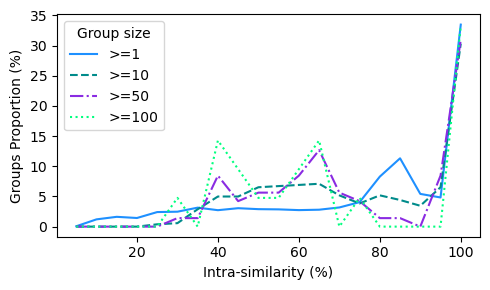

In [6]:
setting_1 = lines_with_lower_bound_build(total,"","Intra-similarity (%)", "Groups Proportion (%)", "ETH")
ChartDrawer.multi_lines("img/intra_uni.png",setting_1)


In [7]:
intra_similarities = pd.read_csv("data/similarity/panv2_intra_similarities.csv")
one_scammer_intra_similarities = pd.read_csv("data/similarity/panv2_one_scammer_group_intra_similarities.csv")
total = pd.concat([intra_similarities, one_scammer_intra_similarities], axis=0)
intra_similarities

,group_id:,scammers,available_tokens,similarity
0,3,165,230,0.275151
1,5,23399,10000,0.208414
2,6,29,38,0.748069
3,9,614,17,0.558142
4,10,152,2931,0.614426
...,...,...,...,...
12490,133220,2,2,0.684211
12491,133311,2,2,0.824000
12492,133938,2,2,0.840000
12493,135415,2,2,0.135266


count    20628.000000
mean         0.756256
std          0.263272
min          0.000000
25%          0.590961
50%          0.826087
75%          1.000000
max          1.000000
Name: similarity, dtype: float64

Group size 1 [19, 220, 322, 404, 434, 524, 512, 643, 594, 592, 497, 480, 402, 609, 554, 967, 3835, 1431, 910, 6679]
Group size 1 (%) [ 0.09210781  1.06651154  1.56098507  1.95850301  2.1039364   2.54023657
  2.48206322  3.11712236  2.87958115  2.86988559  2.40934652  2.32693426
  1.94880745  2.95229785  2.68566996  4.68780299 18.59123521  6.93717277
  4.41147954 32.37832073]


count    1025.000000
mean        0.710193
std         0.236644
min         0.098765
25%         0.505507
50%         0.743488
75%         0.933333
max         1.000000
Name: similarity, dtype: float64

Group size 10 [0, 1, 1, 5, 8, 31, 44, 47, 47, 62, 54, 57, 49, 51, 64, 49, 101, 53, 70, 231]
Group size 10 (%) [ 0.          0.09756098  0.09756098  0.48780488  0.7804878   3.02439024
  4.29268293  4.58536585  4.58536585  6.04878049  5.26829268  5.56097561
  4.7804878   4.97560976  6.24390244  4.7804878   9.85365854  5.17073171
  6.82926829 22.53658537]


count    133.000000
mean       0.654700
std        0.231939
min        0.158974
25%        0.452636
50%        0.673681
75%        0.874340
max        1.000000
Name: similarity, dtype: float64

Group size 50 [0, 0, 0, 1, 2, 5, 6, 9, 9, 7, 11, 6, 10, 7, 11, 6, 5, 7, 16, 15]
Group size 50 (%) [ 0.          0.          0.          0.7518797   1.5037594   3.7593985
  4.5112782   6.76691729  6.76691729  5.26315789  8.27067669  4.5112782
  7.51879699  5.26315789  8.27067669  4.5112782   3.7593985   5.26315789
 12.03007519 11.27819549]


count    61.000000
mean      0.643097
std       0.231163
min       0.158974
25%       0.446855
50%       0.638223
75%       0.863422
max       1.000000
Name: similarity, dtype: float64

Group size 100 [0, 0, 0, 1, 1, 2, 2, 4, 6, 4, 5, 2, 4, 5, 3, 1, 4, 5, 7, 5]
Group size 100 (%) [ 0.          0.          0.          1.63934426  1.63934426  3.27868852
  3.27868852  6.55737705  9.83606557  6.55737705  8.19672131  3.27868852
  6.55737705  8.19672131  4.91803279  1.63934426  6.55737705  8.19672131
 11.47540984  8.19672131]


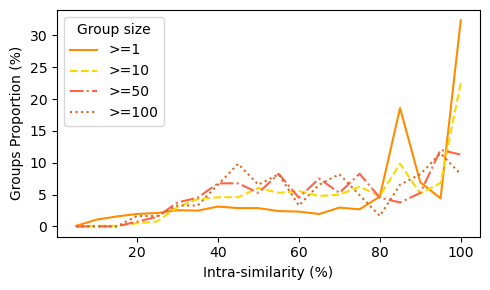

In [8]:
setting_1 = lines_with_lower_bound_build(total,"","Intra-similarity (%)", "Groups Proportion (%)", "BNB")
ChartDrawer.multi_lines("img/intra_pan.png", setting_1)

# INTER SIMILARITY

count    74254.000000
mean         0.274613
std          0.068698
min          0.011937
25%          0.213926
50%          0.286301
75%          0.336296
max          0.390249
Name: similarity, dtype: float64

Group size 1 [45, 71, 1547, 13038, 14059, 12959, 19499, 13036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 1 (%) [ 0.0606028   0.09561774  2.08338945 17.55865004 18.93366014 17.45225846
 26.25986479 17.55595658  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    530.000000
mean       0.219741
std        0.062774
min        0.107894
25%        0.174517
50%        0.198739
75%        0.268996
max        0.375602
Name: similarity, dtype: float64

Group size 10 [0, 0, 33, 238, 116, 60, 56, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 10 (%) [ 0.          0.          6.22641509 44.90566038 21.88679245 11.32075472
 10.56603774  5.09433962  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    72.000000
mean      0.202072
std       0.046111
min       0.134569
25%       0.172378
50%       0.195744
75%       0.215371
max       0.356767
Name: similarity, dtype: float64

Group size 50 [0, 0, 5, 35, 23, 5, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 50 (%) [ 0.          0.          6.94444444 48.61111111 31.94444444  6.94444444
  2.77777778  2.77777778  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    21.000000
mean      0.201787
std       0.036922
min       0.137617
25%       0.178958
50%       0.196380
75%       0.210295
max       0.302191
Name: similarity, dtype: float64

Group size 100 [0, 0, 1, 12, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 100 (%) [ 0.          0.          4.76190476 57.14285714 28.57142857  4.76190476
  4.76190476  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


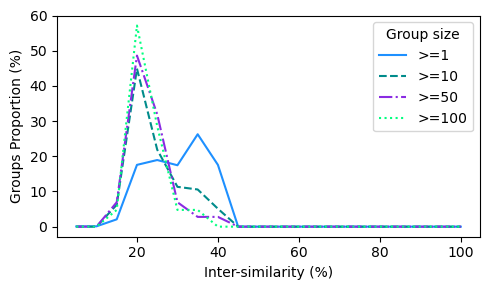

In [9]:
inter_similarities = pd.read_csv("data/similarity/univ2_inter_similarities.csv")
setting_1 = lines_with_lower_bound_build(inter_similarities,"", "Inter-similarity (%)", "Groups Proportion (%)", "ETH", "upper right")
ChartDrawer.multi_lines("img/inter_uni.png",setting_1)

count    112011.000000
mean          0.212324
std           0.039937
min           0.007298
25%           0.186063
50%           0.216981
75%           0.241799
max           0.307771
Name: similarity, dtype: float64

Group size 1 [163, 246, 6645, 34724, 53079, 17122, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 1 (%) [1.45521422e-01 2.19621287e-01 5.93245306e+00 3.10005267e+01
 4.73873102e+01 1.52859987e+01 2.85686227e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


count    1041.000000
mean        0.199135
std         0.035789
min         0.038689
25%         0.180733
50%         0.197714
75%         0.217377
max         0.298160
Name: similarity, dtype: float64

Group size 10 [4, 6, 67, 479, 394, 91, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 10 (%) [ 0.38424592  0.57636888  6.43611912 46.01344861 37.84822286  8.74159462
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    134.000000
mean       0.193068
std        0.034256
min        0.068817
25%        0.176265
50%        0.189996
75%        0.210763
max        0.283632
Name: similarity, dtype: float64

Group size 50 [0, 1, 13, 71, 40, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 50 (%) [ 0.          0.74626866  9.70149254 52.98507463 29.85074627  6.71641791
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    62.000000
mean      0.194945
std       0.030256
min       0.132261
25%       0.179370
50%       0.189996
75%       0.206110
max       0.283632
Name: similarity, dtype: float64

Group size 100 [0, 0, 2, 40, 16, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 100 (%) [ 0.          0.          3.22580645 64.51612903 25.80645161  6.4516129
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


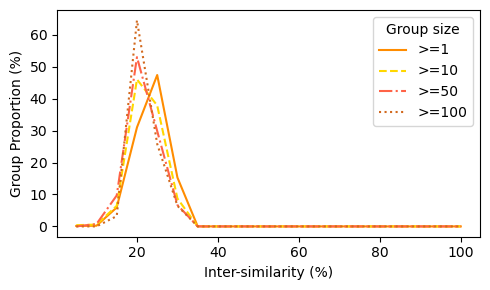

In [10]:
inter_similarities = pd.read_csv("data/similarity/panv2_inter_similarities.csv")
setting_1 = lines_with_lower_bound_build(inter_similarities,"","Inter-similarity (%)", "Group Proportion (%)", "BNB", "upper right")
ChartDrawer.multi_lines("img/inter_pan.png",setting_1)

Group size 20 [4.66309163e-02 1.16577291e+00 1.77197482e+00 1.42224295e+00
 2.37817673e+00 2.07507578e+00 2.33154581e+00 1.51550478e+00
 1.49218932e+00 1.79529028e+00 1.23571928e+00 2.09839123e+00
 1.84192119e+00 2.19165307e+00 2.26159944e+00 5.52576358e+00
 6.41175099e+00 4.68640709e+00 5.22266263e+00 5.25297272e+01]


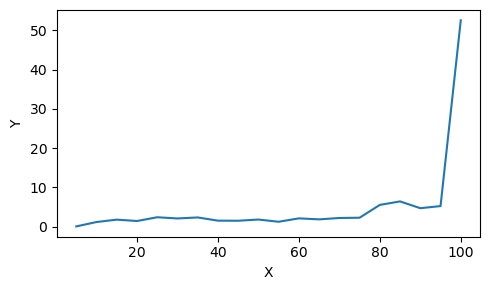

68.8505479132665
100% similarities 2038


In [11]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
idv_similarities = pd.read_csv("data/similarity/univ2_individual_similarities.csv")
y = list(idv_similarities.similarity.values * 100)
y = count_bins(y, bins)
y = to_percentage(y)
print(f"Group size {len(y)}", y)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/idv_uni.png", setting)
print(sum(y[-4:]))
print("100% similarities", len(idv_similarities[idv_similarities["similarity"] == 1]))

Group size 20 [ 0.14101886  1.0646924   1.81561784  2.17874141  1.86144897  1.75921029
  1.92490746  2.0553499   2.28098008  2.30565838  2.24925084  1.94253481
  1.66754803  2.29860744  2.27392914  3.66296492 14.16534461  7.48105059
  7.49867795 39.37246607]


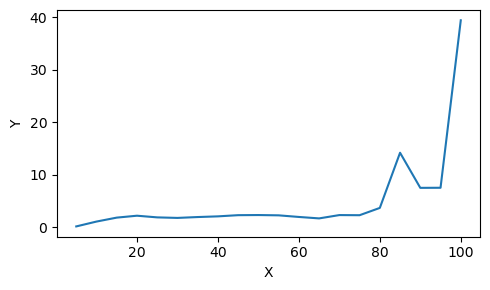

68.51753922087079


In [12]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
idv_similarities = pd.read_csv("data/similarity/panv2_individual_similarities.csv")
y = list(idv_similarities.similarity.values * 100)
y = count_bins(y, bins)
y = to_percentage(y)
print(f"Group size {len(y)}", y)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/idv_pan.png", setting)


In [13]:
print(sum(y[-4:]))
print("100% similarities", len(idv_similarities[idv_similarities["similarity"] == 1]))

100% similarities 10236
